In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'C:\Users\Latitude\Downloads\zomato_restaurants_in_India.csv')
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


# Data Cleaning and Preparation:

● Identify and handle missing values.
● Detect and correct any inconsistencies in the dataset (e.g., data types, mislabeled categories).
● Feature engineering (if necessary), like extracting useful information from existing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [4]:
df.shape

(211944, 26)

In [5]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [6]:
df.duplicated().sum()

151527

In [7]:
df1=df.copy()
df1

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [8]:
df1.drop_duplicates(inplace=True)

In [9]:
df1.shape

(60417, 26)

In [10]:
for column in df1:
    print("Column"," ",column,"  uniquevalus  are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   res_id   uniquevalus  are : 55568
[ 3400299  3400005  3401013 ... 18019952  3200996  3201138]
-------------------------
Column   name   uniquevalus  are : 41100
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']
-------------------------
Column   establishment   uniquevalus  are : 27
["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]
-------------------------
Column   url   uniquevalus  are : 55568
['https://www.zomato.com/agra/bikanervala-khandari?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1'
 'https://www.zomato.com/agra/mama-chicken-mama-franky-h

In [11]:
for column in df1:
    print("Column"," ",column," value counts is :", df1[column].value_counts())
    print("-------------------------------------------------------")

Column   res_id  value counts is : res_id
18453954    9
49261       7
18800810    6
72604       5
18548856    5
           ..
2100484     1
2100122     1
18710135    1
2100223     1
3201138     1
Name: count, Length: 55568, dtype: int64
-------------------------------------------------------
Column   name  value counts is : name
Domino's Pizza                                       406
Cafe Coffee Day                                      323
KFC                                                  261
Subway                                               211
Keventers                                            208
                                                    ... 
Jai Bhole ki Vaishnav Bhojnalaya                       1
Shri Hari Snacks                                       1
Greeno Restaurant                                      1
The Dark Mustache ( Kathi Roll Barbeque Chicken )      1
Geeta lodge                                            1
Name: count, Length: 41100, dtype: int64
-

Column   highlights  value counts is : highlights
['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']                                                                                              925
[]                                                                                                                                                               743
['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Indoor Seating']                                                                                  627
['Takeaway Available', 'Cash', 'Indoor Seating', 'Desserts and Bakes']                                                                                           373
['Cash', 'Takeaway Available']                                                                                                                                   355
                                                                                                                             

In [12]:
df1.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [13]:
print("Amount of missing values in - ")
for column in df1.columns:
    percentage_missing = np.mean(df1[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
res_id : 0%
name : 0%
establishment : 0%
url : 0%
address : 0%
city : 0%
city_id : 0%
locality : 0%
latitude : 0%
longitude : 0%
zipcode : 79%
country_id : 0%
locality_verbose : 0%
cuisines : 1%
timings : 2%
average_cost_for_two : 0%
price_range : 0%
currency : 0%
highlights : 0%
aggregate_rating : 0%
rating_text : 0%
votes : 0%
photo_count : 0%
opentable_support : 0%
delivery : 0%
takeaway : 0%


<Axes: >

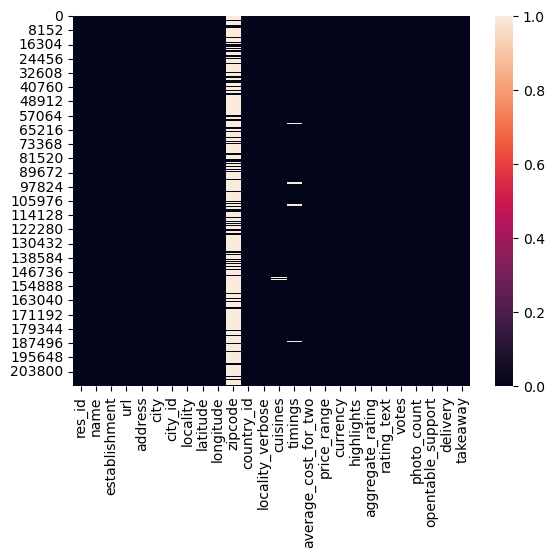

In [14]:
sns.heatmap(df.isna())

In [15]:
df1=df1.drop(['zipcode'],axis=1)

In [16]:
df1.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [17]:
for column in df1.columns:
    print(column,':',pd.api.types.infer_dtype(df1[column]))

res_id : integer
name : string
establishment : string
url : string
address : string
city : string
city_id : integer
locality : string
latitude : floating
longitude : floating
country_id : integer
locality_verbose : string
cuisines : string
timings : string
average_cost_for_two : integer
price_range : integer
currency : string
highlights : string
aggregate_rating : floating
rating_text : string
votes : integer
photo_count : integer
opentable_support : floating
delivery : integer
takeaway : integer


In [18]:
df1['cuisines'] = df1['cuisines'].fillna(df1['cuisines'].mode()[0])

In [19]:
df1['address'].fillna('not known', inplace = True)

In [20]:
df1['timings'].fillna('not known', inplace = True)

In [21]:
df1['opentable_support'].fillna(0.0, inplace = True)

<Axes: >

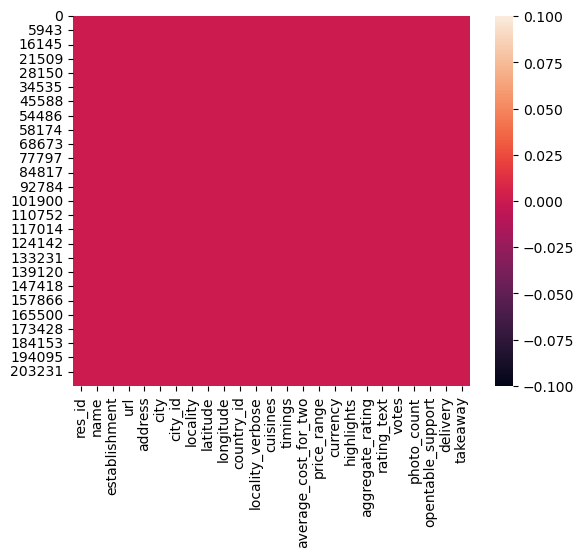

In [22]:
sns.heatmap(df1.isna())

In [23]:
df1.isna().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [24]:
print("Amount of missing values in - ")
for column in df1.columns:
    percentage_missing = np.mean(df1[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Amount of missing values in - 
res_id : 0%
name : 0%
establishment : 0%
url : 0%
address : 0%
city : 0%
city_id : 0%
locality : 0%
latitude : 0%
longitude : 0%
country_id : 0%
locality_verbose : 0%
cuisines : 0%
timings : 0%
average_cost_for_two : 0%
price_range : 0%
currency : 0%
highlights : 0%
aggregate_rating : 0%
rating_text : 0%
votes : 0%
photo_count : 0%
opentable_support : 0%
delivery : 0%
takeaway : 0%


In [25]:
df1.loc[df1['votes']<0, 'votes'] = -1*df1['votes']

# Exploratory Data Analysis:

Descriptive Statistics: 
Summarize the central tendency, dispersion, and shape of the dataset's distribution.

In [26]:
df1.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.041700e+04,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000,60417.0,60417.000000,60417.0
mean,1.309335e+07,3418.302183,21.349431,76.588040,1.0,538.304517,1.730821,3.032868,261.575583,194.247414,0.0,-0.371799,-1.0
std,8.132809e+06,5179.351720,41.187998,10.600514,0.0,593.852227,0.880462,1.440751,728.283944,705.682451,0.0,0.925249,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000488e+06,7.000000,16.324755,74.654029,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320884,77.135310,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886666e+07,11295.000000,26.744389,79.928190,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [27]:
selected_columns = ['average_cost_for_two','price_range','aggregate_rating','votes','photo_count']
df1[selected_columns].describe()

,average_cost_for_two,price_range,aggregate_rating,votes,photo_count
count,60417.000000,60417.000000,60417.000000,60417.000000,60417.000000
mean,538.304517,1.730821,3.032868,261.575583,194.247414
std,593.852227,0.880462,1.440751,728.283944,705.682451
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,200.000000,1.000000,2.900000,7.000000,1.000000
50%,400.000000,1.000000,3.500000,42.000000,11.000000
75%,600.000000,2.000000,4.000000,207.000000,82.000000
max,30000.000000,4.000000,4.900000,42539.000000,17702.000000


In [28]:
df1.describe(include=['bool','object'])

,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417,60417
unique,41100,27,55568,50658,99,3731,3910,9382,7741,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/candy-and-green-...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good
freq,406,15477,9,37,2612,804,315,5057,7678,60417,925,17569


In [29]:
med=df1.median(numeric_only=True)
med

res_id                  1.869150e+07
city_id                 2.600000e+01
latitude                2.232088e+01
longitude               7.713531e+01
country_id              1.000000e+00
average_cost_for_two    4.000000e+02
price_range             1.000000e+00
aggregate_rating        3.500000e+00
votes                   4.200000e+01
photo_count             1.100000e+01
opentable_support       0.000000e+00
delivery               -1.000000e+00
takeaway               -1.000000e+00
dtype: float64

In [30]:
var=df1.var(numeric_only=True)
var

res_id                  6.614258e+13
city_id                 2.682568e+07
latitude                1.696451e+03
longitude               1.123709e+02
country_id              0.000000e+00
average_cost_for_two    3.526605e+05
price_range             7.752142e-01
aggregate_rating        2.075765e+00
votes                   5.303975e+05
photo_count             4.979877e+05
opentable_support       0.000000e+00
delivery                8.560857e-01
takeaway                0.000000e+00
dtype: float64

In [31]:
skew = df1.skew(axis=0,numeric_only=True)
skew

res_id                   -0.760864
city_id                   0.865463
latitude                235.375176
longitude                -5.843506
country_id                0.000000
average_cost_for_two      6.055283
price_range               0.996345
aggregate_rating         -1.380707
votes                    12.764811
photo_count               9.094060
opentable_support         0.000000
delivery                  0.801028
takeaway                  0.000000
dtype: float64

In [32]:
kurt = df1.kurt(axis=0,numeric_only=True)
kurt

res_id                     -1.368407
city_id                    -1.250816
latitude                57025.993425
longitude                  40.271610
country_id                  0.000000
average_cost_for_two      139.079530
price_range                 0.070243
aggregate_rating            0.461597
votes                     449.344422
photo_count               122.807763
opentable_support           0.000000
delivery                   -1.350681
takeaway                    0.000000
dtype: float64

In [33]:
df2=pd.DataFrame([med,var,skew,kurt],index=['median','variance','skewness','kurtosis'])
df2[selected_columns]

,average_cost_for_two,price_range,aggregate_rating,votes,photo_count
median,400.000000,1.000000,3.500000,42.000000,11.000000
variance,352660.466987,0.775214,2.075765,530397.503097,497987.722353
skewness,6.055283,0.996345,-1.380707,12.764811,9.094060
kurtosis,139.079530,0.070243,0.461597,449.344422,122.807763


Distribution Analysis: Analyze the distribution of key variables (e.g., ratings, price range, cuisines).

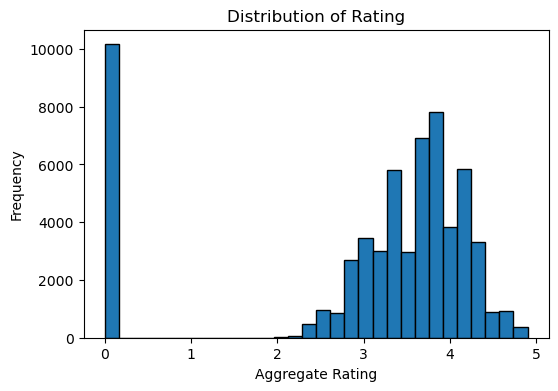

In [34]:
plt.figure(figsize=(6, 4))
plt.hist(df1['aggregate_rating'], bins=30, edgecolor='black')
plt.title('Distribution of Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

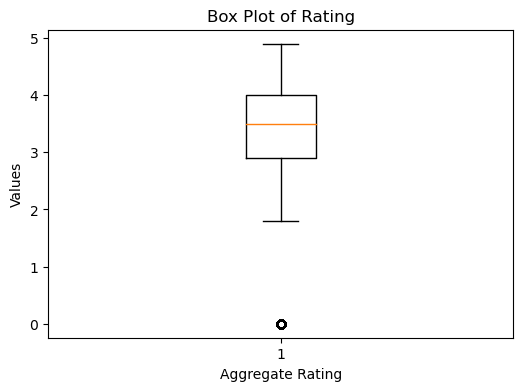

In [35]:
plt.figure(figsize=(6, 4))
plt.boxplot(df1['aggregate_rating'])

# Set labels and title
plt.xlabel('Aggregate Rating')
plt.ylabel('Values')
plt.title('Box Plot of Rating')

# Show plot
plt.show()

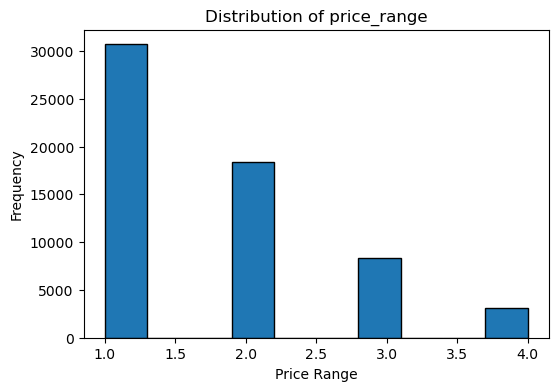

In [36]:
plt.figure(figsize=(6, 4))
plt.hist(df1['price_range'], bins=10, edgecolor='black')
plt.title('Distribution of price_range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

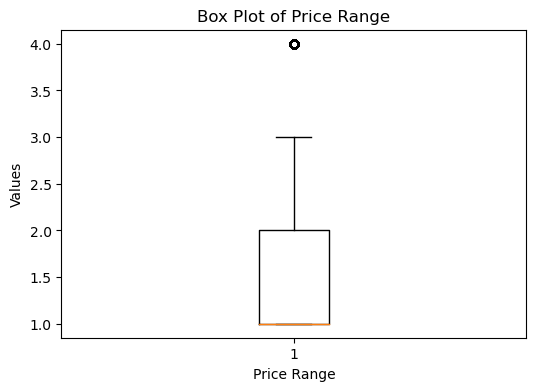

In [37]:
plt.figure(figsize=(6, 4))
plt.boxplot(df1['price_range'])

# Set labels and title
plt.xlabel('Price Range')
plt.ylabel('Values')
plt.title('Box Plot of Price Range')

# Show plot
plt.show()

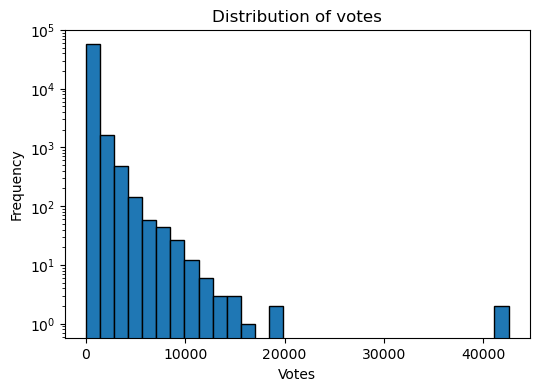

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(df1['votes'], bins=30, edgecolor='black')
plt.yscale('log')
plt.title('Distribution of votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

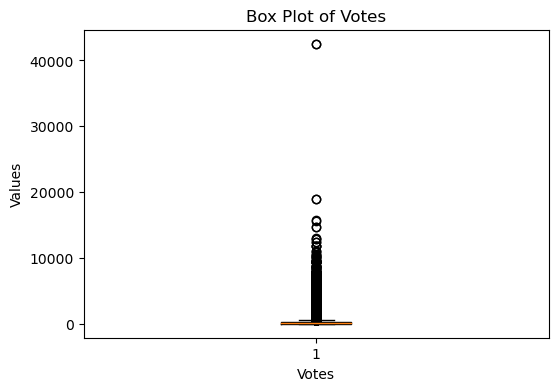

In [39]:
plt.figure(figsize=(6, 4))
plt.boxplot(df1['votes'])
plt.xlabel('Votes')
plt.ylabel('Values')
plt.title('Box Plot of Votes')
plt.show()

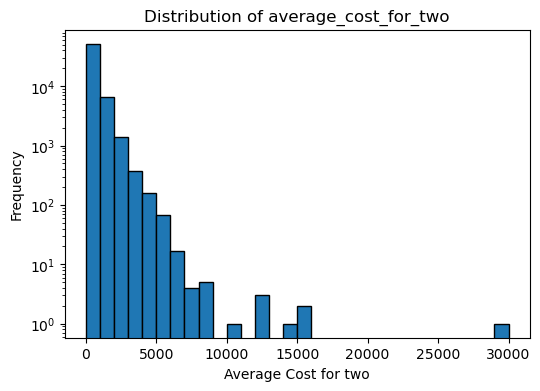

In [40]:
plt.figure(figsize=(6, 4)) 
plt.hist(df1['average_cost_for_two'], bins=30, edgecolor='black')
plt.yscale('log')
plt.title('Distribution of average_cost_for_two')
plt.xlabel('Average Cost for two')
plt.ylabel('Frequency')
plt.show()

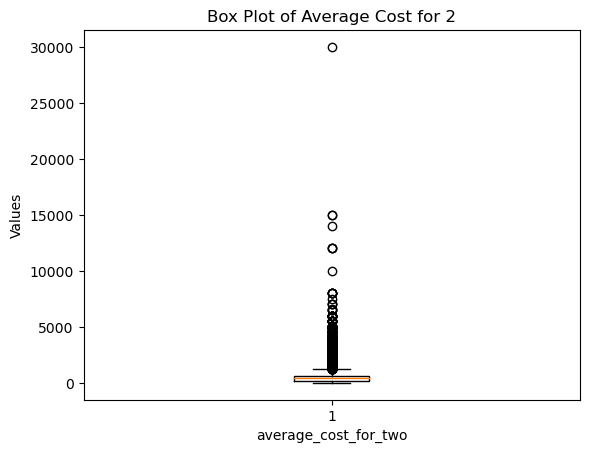

In [41]:
plt.boxplot(df1['average_cost_for_two'])
plt.xlabel('average_cost_for_two')
plt.ylabel('Values')
plt.title('Box Plot of Average Cost for 2')
plt.show()

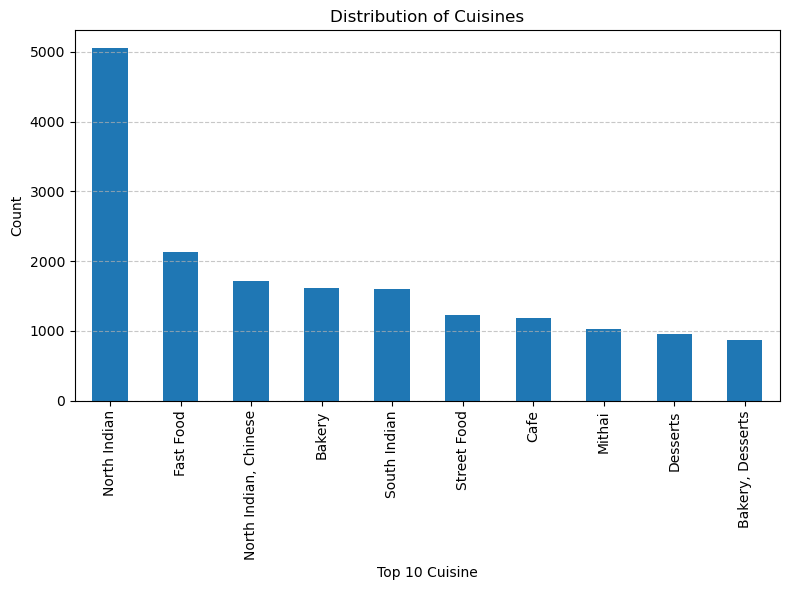

In [42]:
plt.figure(figsize=(8, 6))
df1['cuisines'].value_counts().head(10).plot(kind='bar')
plt.title('Distribution of Cuisines')
plt.xlabel('Top 10 Cuisine')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation Analysis: Examine the relationships between different variables.

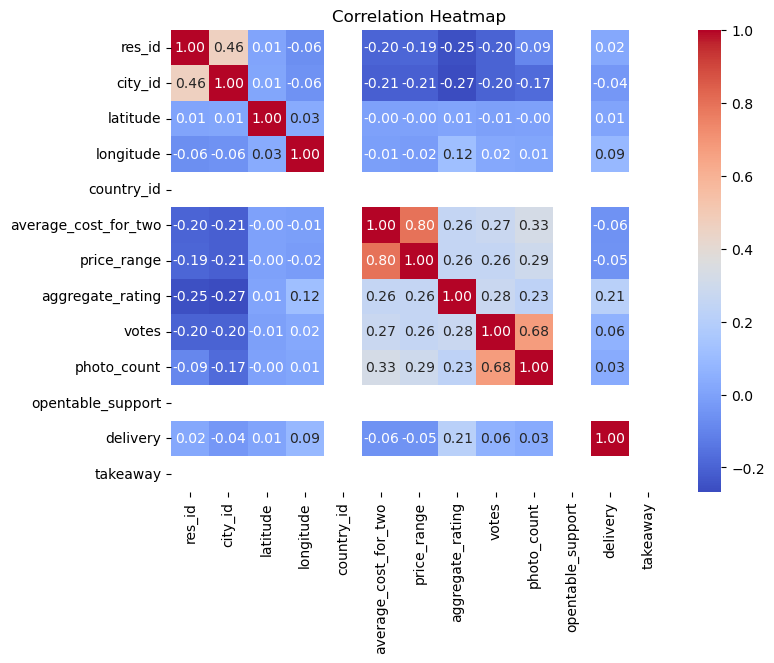

In [43]:
df1_numeric = df1.select_dtypes(include=[np.number])
correlation_matrix = df1_numeric.corr()

# Create heatmap
plt.figure(figsize=(8, 6))  # Adjust the size of the heatmap if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

# Regional Analysis:

● Compare the restaurant trends and customer preferences across different
cities or regions in India.● Identify unique characteristics of the dining scene in each region.

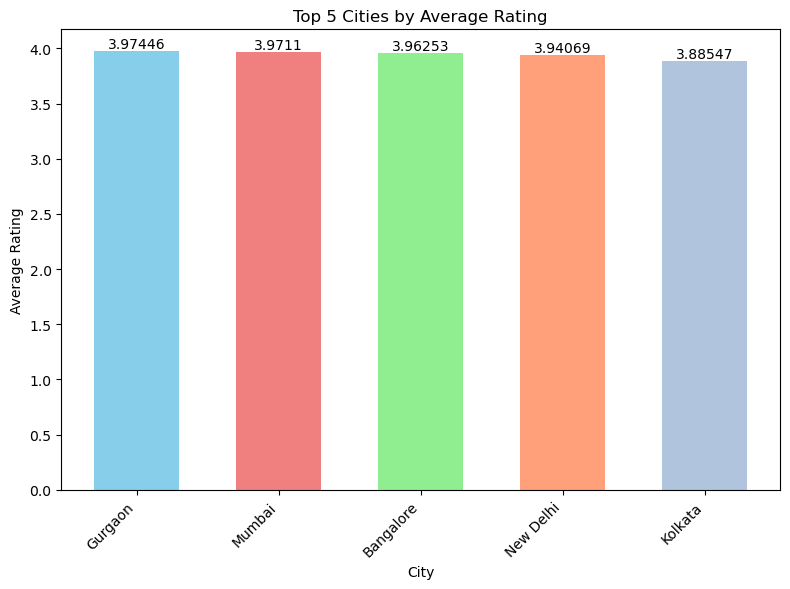

In [44]:
df2=df1[df1['aggregate_rating']>0]
grouped_data_r = df2.groupby('city')['aggregate_rating'].mean().reset_index()

# Sort the DataFrame by rating in descending order
sorted_data_r = grouped_data_r.sort_values(by='aggregate_rating', ascending=False)

# Select top 5 cities
top_5_r = sorted_data_r.head(5)

# Define colors for each bar
colors = ['#87CEEB','#F08080','#90EE90','#FFA07A','#B0C4DE']

# Plotting
plt.figure(figsize=(8, 6))
p=plt.bar(top_5_r['city'], top_5_r['aggregate_rating'],width=0.6,color=colors)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.bar_label(p)
plt.title('Top 5 Cities by Average Rating')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

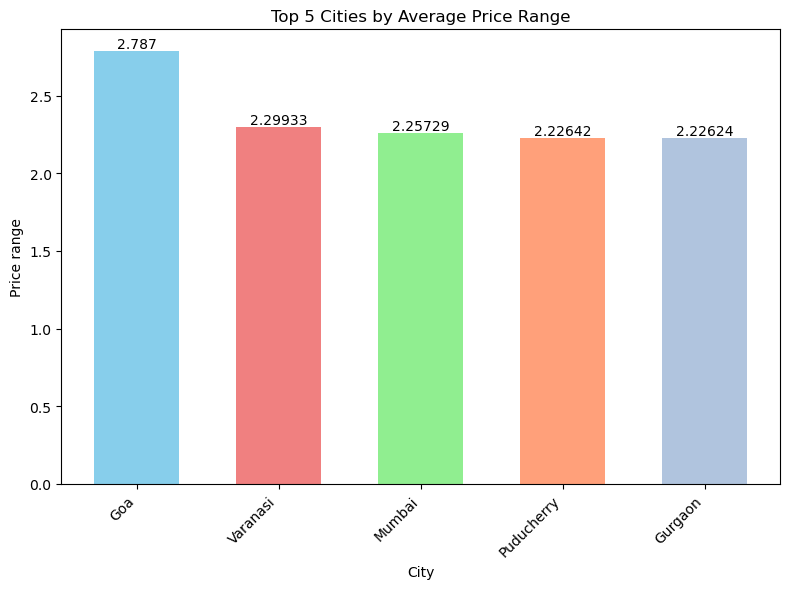

In [45]:
grouped_data_p = df1.groupby('city')['price_range'].mean().reset_index()

# Sort the DataFrame by price_range in descending order
sorted_data_p = grouped_data_p.sort_values(by='price_range', ascending=False)

# Select top 5 cities
top_5_p = sorted_data_p.head(5)

# Plotting
plt.figure(figsize=(8, 6))
p=plt.bar(top_5_p['city'], top_5_p['price_range'],width=0.6,color=colors)
plt.xlabel('City')
plt.ylabel('Price range')
plt.bar_label(p)
plt.title('Top 5 Cities by Average Price Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [46]:
cost_for_two=df1[df1['average_cost_for_two']>0]

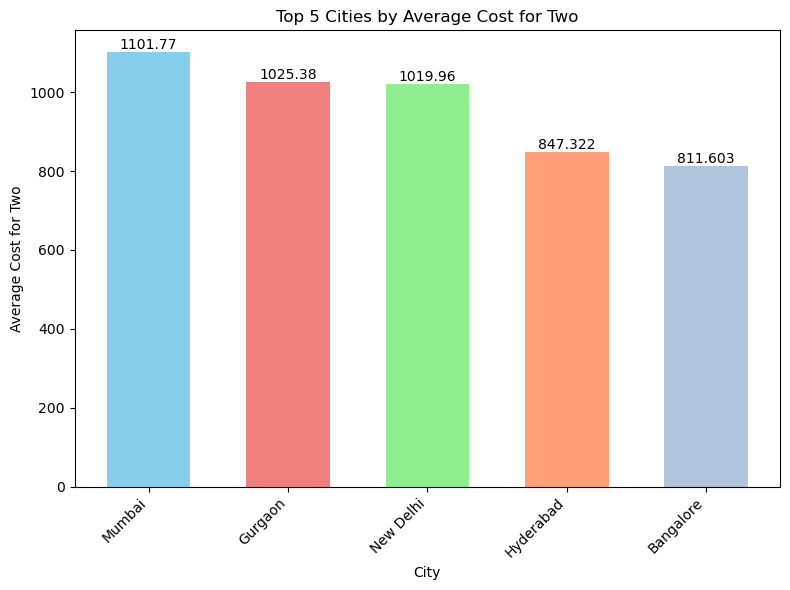

In [47]:
grouped_data_c = cost_for_two.groupby('city')['average_cost_for_two'].mean().reset_index()

# Sort the DataFrame by cost for 2 in descending order
sorted_data_c = grouped_data_c.sort_values(by='average_cost_for_two', ascending=False)

# Select top 5 cities
top_5_c = sorted_data_c.head(5)

# Plotting
plt.figure(figsize=(8, 6))
p=plt.bar(top_5_c['city'], top_5_c['average_cost_for_two'],width=0.6,color=colors)
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.bar_label(p)
plt.title('Top 5 Cities by Average Cost for Two')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [48]:
popular_establishment=df1.groupby(['city','establishment']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pd.DataFrame(popular_establishment).head(5)

,city,establishment,count
230,Chennai,['Casual Dining'],740
1000,Mumbai,['Casual Dining'],640
148,Bangalore,['Casual Dining'],541
399,Goa,['Casual Dining'],499
1290,Pune,['Casual Dining'],459


In [49]:
popular_cuisine=df1.groupby(['city','cuisines']).size().reset_index(name='count').sort_values(by='count',ascending=False)
pd.DataFrame(popular_cuisine).head(5)

,city,cuisines,count
8136,Jaipur,North Indian,204
8415,Jalandhar,North Indian,162
11814,Madurai,South Indian,142
6740,Gwalior,North Indian,140
10958,Kota,North Indian,136


In [50]:
top_cities= df1['city'].value_counts().head(5)
top_5_cities=top_cities.index.tolist()
df_top_5 = df1[df1['city'].isin(top_5_cities)]

In [51]:
unique_highlights = df_top_5['highlights'].value_counts().head(5)
#Top 5 Unique Highlights of top 5 Restaurants
pd.DataFrame(unique_highlights)

,count
highlights,
"['Cash', 'Takeaway Available', 'Credit Card', 'Delivery', 'Debit Card', 'Indoor Seating', 'Desserts and Bakes', 'Air Conditioned', 'Pure Veg']",48
"['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Lunch', 'Delivery', 'Credit Card', 'Indoor Seating', 'Air Conditioned']",42
"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Indoor Seating']",41
"['Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",37
"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takeaway Available', 'Outdoor Seating']",35


# Customer Preference Analysis:

● Analyze the types of cuisines that are popular in different regions.
● Examine the relationship between restaurant ratings, price range, and popularity.

In [52]:
# Count the occurrences of each cuisine type in each city
cuisine_counts = df_top_5.groupby(['city', 'cuisines']).size().reset_index(name='Count')

# Determine the top 5 cuisines in each city based on the count
top_5_cuisines = cuisine_counts.groupby('city').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

top_5_cuisines

,city,cuisines,Count
0,Bangalore,South Indian,103
1,Bangalore,"Mithai, Street Food",102
2,Bangalore,North Indian,64
3,Bangalore,"Beverages, Desserts, Ice Cream",48
4,Bangalore,"Bakery, Desserts",44
5,Chennai,South Indian,132
6,Chennai,"Ice Cream, Desserts",93
7,Chennai,Finger Food,56
8,Chennai,North Indian,48
9,Chennai,"Burger, Fast Food",40


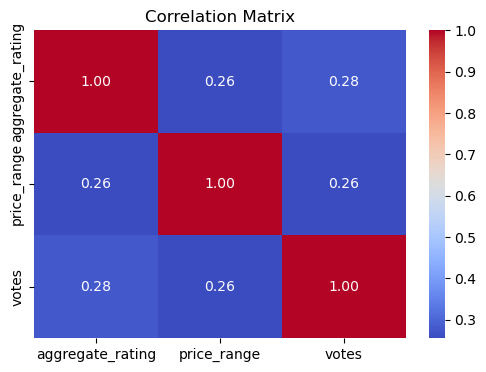

In [53]:
# Correlation analysis
correlation_matrix = df1[['aggregate_rating', 'price_range', 'votes']].corr()

# Visualization of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

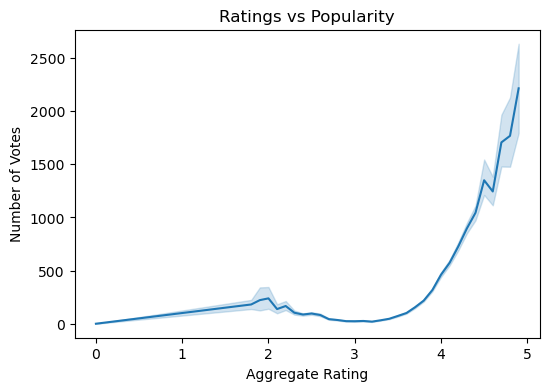

In [64]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='aggregate_rating', y='votes', data=df1)
plt.title('Ratings vs Popularity')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.show()

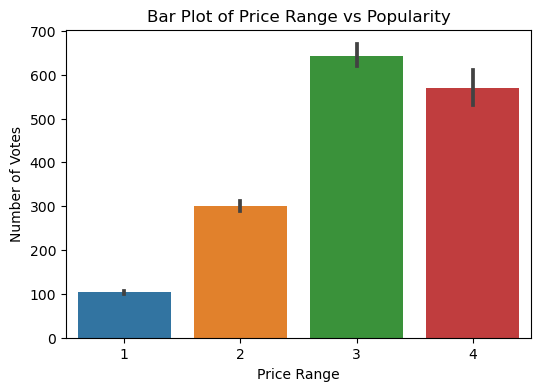

In [55]:
plt.figure(figsize=(6, 4))
sns.barplot(x='price_range', y='votes', data=df1)
plt.title('Bar Plot of Price Range vs Popularity')
plt.xlabel('Price Range')
plt.ylabel('Number of Votes')
plt.show()

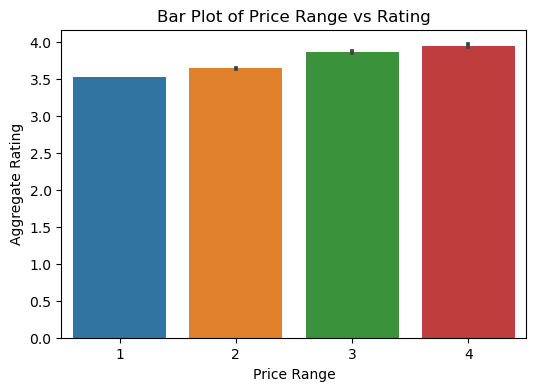

In [56]:
df2=df1[df1['aggregate_rating']>0]
plt.figure(figsize=(6, 4))
sns.barplot(x='price_range', y='aggregate_rating', data=df2)
plt.title('Bar Plot of Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

# Competitive Analysis:

● Identify major competitors in each region based on cuisine, pricing, and
ratings.

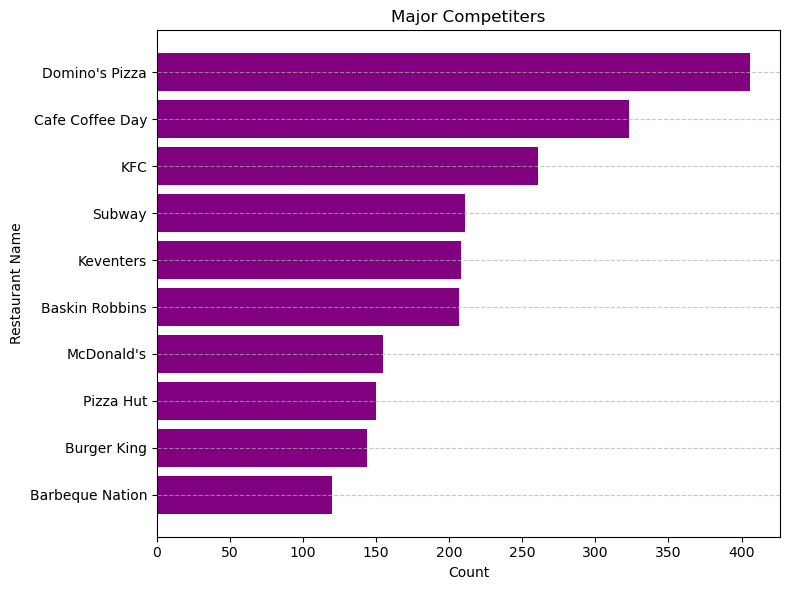

In [57]:
competiters = df1['name'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(competiters.index, competiters.values, color='purple')
plt.title('Major Competiters')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [59]:
competiter_votes=df1.groupby('name')['votes'].sum().sort_values(ascending=False).head(10)

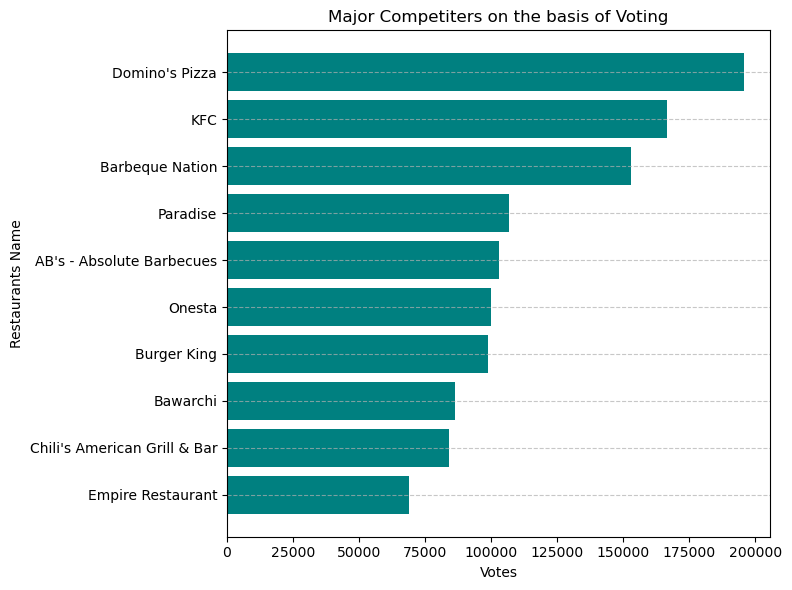

In [60]:
plt.figure(figsize=(8, 6))
plt.barh(competiter_votes.index, competiter_votes.values, color='teal')
plt.title('Major Competiters on the basis of Voting')
plt.xlabel('Votes')
plt.ylabel('Restaurants Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [61]:
cost_for_two=df1[df1['average_cost_for_two']>0]
competiter_price=cost_for_two.groupby('name')['average_cost_for_two'].mean().sort_values(ascending=False).head(10)

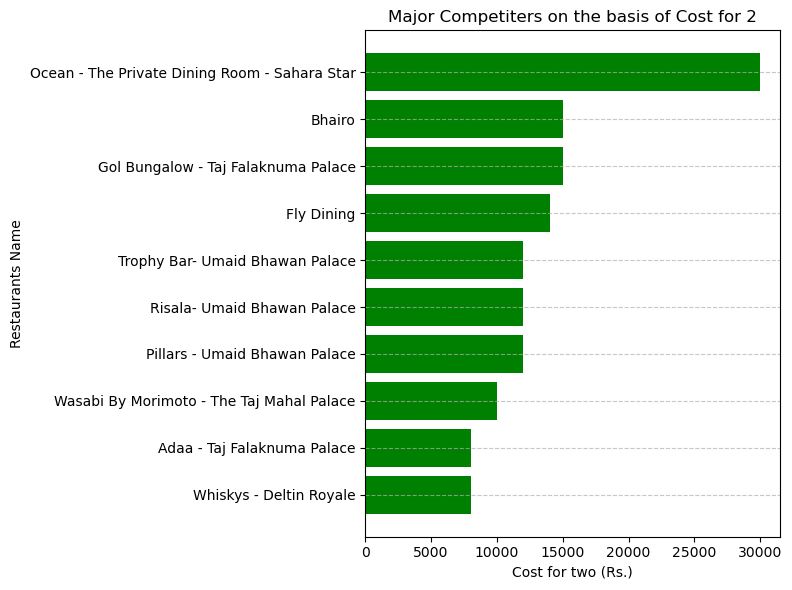

In [62]:
plt.figure(figsize=(8, 6))
plt.barh(competiter_price.index, competiter_price.values, color='green')
plt.title('Major Competiters on the basis of Cost for 2')
plt.xlabel('Cost for two (Rs.)')
plt.ylabel('Restaurants Name')
plt.gca().invert_yaxis()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

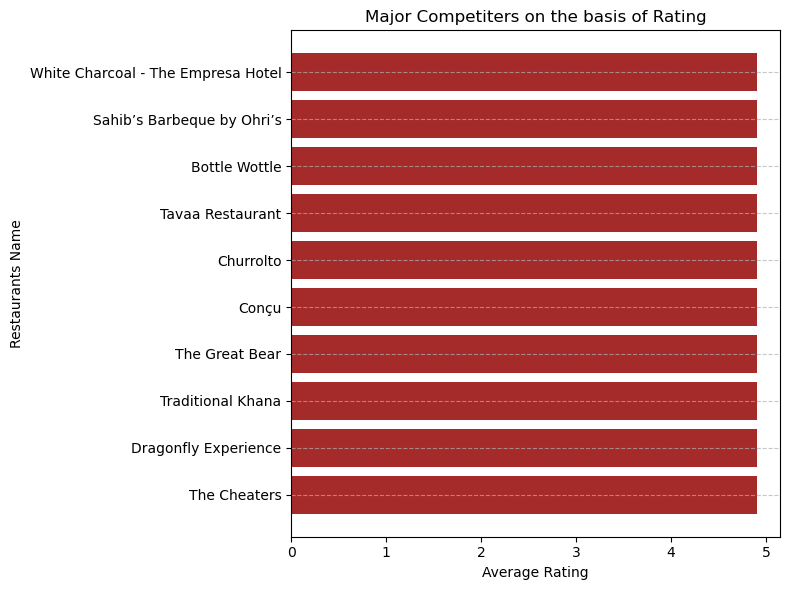

In [63]:
competiter_rating=df2.groupby('name')['aggregate_rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
plt.barh(competiter_rating.index, competiter_rating.values, color='brown')
plt.title('Major Competiters on the basis of Rating')
plt.xlabel('Average Rating')
plt.ylabel('Restaurants Name')
plt.gca().invert_yaxis()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()